# MLP Evaluation

In [1]:
from google.colab import drive
drive.mount('/content/drive')
file = r'/content/drive/MyDrive/Colab/mlp-mcr/dataset.csv'

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(file)

# dataset
dataset = df.values
X = dataset[:, 6] # mt column
Y = dataset[:, 5] # mcr column

In [3]:
from sklearn.model_selection import train_test_split
X = X.reshape(-1, 1)

# split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# size
print("Train: ", X_train.shape)
print("Val: ", X_val.shape)
print("Test: ", X_test.shape)

Train:  (115196, 1)
Val:  (28800, 1)
Test:  (36000, 1)


Building MLP Neural Net with PyTorch

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

MLP Model

In [5]:
class mlp(nn.Module):
    def __init__(self):
        super(mlp, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 100),
            nn.Linear(100, 1)
        )

    def forward(self, x):
        return self.layers(x)

mlp_pytorch = mlp()

Optimizer

In [6]:
optimizer = optim.Adam(mlp_pytorch.parameters(), lr=0.001)

Loss Func

In [7]:
criterion = nn.L1Loss()

Converting data types to float32 tensors

In [8]:
X_train = torch.tensor(X_train.astype(np.float32))
Y_train = torch.tensor(Y_train.astype(np.float32))
X_val = torch.tensor(X_val.astype(np.float32))
Y_val = torch.tensor(Y_val.astype(np.float32))
X_test = torch.tensor(X_test.astype(np.float32))
Y_test = torch.tensor(Y_test.astype(np.float32))

Data Loader

In [9]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, Y_train)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

Training Loop

In [10]:
epochs = 50
losses = []

for epoch in range(epochs):
    mlp_pytorch.train()
    epoch_loss = 0

    for input_data, target_data in train_loader:
        
        optimizer.zero_grad()
        # fp
        output = mlp_pytorch(input_data)
        # loss
        loss = criterion(output, target_data.view(-1, 1))
        epoch_loss += loss.item()
        # bp
        loss.backward()
        # update
        optimizer.step()

    # avg loss
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)

    # print
    if epoch % 1 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch, epochs, avg_loss))

Epoch [0/50], Loss: 9.8874
Epoch [1/50], Loss: 9.7885
Epoch [2/50], Loss: 9.8044
Epoch [3/50], Loss: 9.7780
Epoch [4/50], Loss: 9.7848
Epoch [5/50], Loss: 9.7781
Epoch [6/50], Loss: 9.7671
Epoch [7/50], Loss: 9.8304
Epoch [8/50], Loss: 9.7591
Epoch [9/50], Loss: 9.7435
Epoch [10/50], Loss: 9.7421
Epoch [11/50], Loss: 9.7491
Epoch [12/50], Loss: 9.6913
Epoch [13/50], Loss: 9.7105
Epoch [14/50], Loss: 9.7054
Epoch [15/50], Loss: 9.6951
Epoch [16/50], Loss: 9.6812
Epoch [17/50], Loss: 9.6986
Epoch [18/50], Loss: 9.6827
Epoch [19/50], Loss: 9.6568
Epoch [20/50], Loss: 9.6532
Epoch [21/50], Loss: 9.6612
Epoch [22/50], Loss: 9.6472
Epoch [23/50], Loss: 9.6443
Epoch [24/50], Loss: 9.6616
Epoch [25/50], Loss: 9.6423
Epoch [26/50], Loss: 9.6400
Epoch [27/50], Loss: 9.6318
Epoch [28/50], Loss: 9.6274
Epoch [29/50], Loss: 9.6397
Epoch [30/50], Loss: 9.6341
Epoch [31/50], Loss: 9.6254
Epoch [32/50], Loss: 9.6357
Epoch [33/50], Loss: 9.6271
Epoch [34/50], Loss: 9.6230
Epoch [35/50], Loss: 9.6328
Ep

Loss Curve

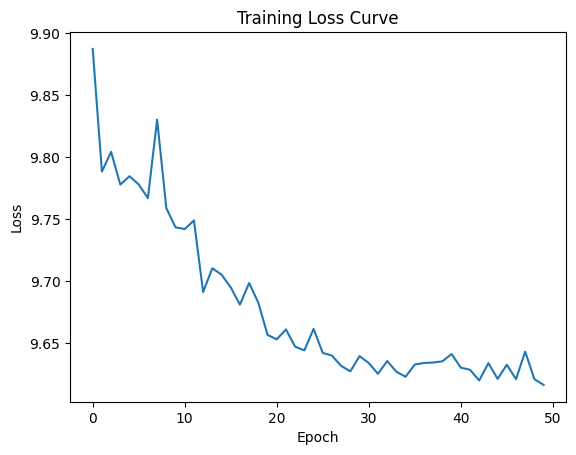

In [11]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()